<a href="https://colab.research.google.com/github/saktiworkstation/saktiworkstation/blob/main/22_11_4677_RDD_FlatMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sakti Kusuma Aji | 22.11.4677

In [ ]:
!pip install pyspark

In [ ]:
from pyspark import SparkContext
import matplotlib.pyplot as plt

In [ ]:
# Inisialisasi SparkContext
sc = SparkContext("local", "Quiss milik sakti")

In [ ]:
# Membuat dataset sales_data.txt
data = [
    "A,5",
    "B,3",
    "A,2",
    "C,1",
    "B,4",
    "A,1",
    "C,2"
]

# Menyimpan dataset ke file sales_data.txt
with open("sales_data.txt", "w") as file:
    for line in data:
        file.write(line + "\n")

In [ ]:
# Membaca file sales_data.txt dan membuat RDD
sales_rdd = sc.textFile("/content/sales_data.txt")

In [ ]:
# Menggunakan flatMap untuk mengubah menjadi Pair RDD
def parse_line(line):
    product_id, quantity = line.split(",")
    return (product_id, int(quantity))

pair_rdd = sales_rdd.flatMap(lambda line: [parse_line(line)])

# Penjelasan
Pair RDD digunakan untuk menyimpan pasangan (key, value), di mana key adalah product_id dan value adalah quantity. Dalam proses ini, Pair RDD digunakan untuk mengelompokkan data berdasarkan product_id dan menghitung total quantity yang terjual.

In [ ]:
# Menggunakan reduceByKey untuk menghitung total quantity untuk setiap product_id
total_quantity_rdd = pair_rdd.reduceByKey(lambda a, b: a + b)

In [ ]:
# Mengurutkan hasil berdasarkan total quantity dalam urutan menurun
sorted_rdd = total_quantity_rdd.sortBy(lambda x: x[1], ascending=False)

In [ ]:
# Menampilkan 5 produk teratas beserta total quantity yang terjual
top_5_products = sorted_rdd.take(5)

In [ ]:
for product, quantity in top_5_products:
    print(f"Product ID: {product}, Total Quantity Sold: {quantity}")

Product ID: A, Total Quantity Sold: 8
Product ID: B, Total Quantity Sold: 7
Product ID: C, Total Quantity Sold: 3


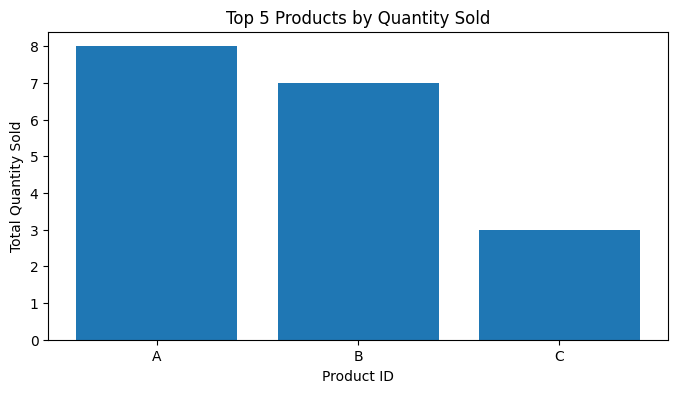

In [ ]:
# Plotting hasil
products = [product for product, quantity in top_5_products]
quantities = [quantity for product, quantity in top_5_products]

plt.figure(figsize=(8, 4))
plt.bar(products, quantities)
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.title('Top 5 Products by Quantity Sold')
plt.show()